In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el CSV
file_path = 'ML_cars.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe
print(df.head())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [21]:
# Información general del dataframe
print(df.info())

# Estadísticas descriptivas
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [22]:
# Calcular la mediana de los precios
median_price = df['price'].median()
print(f"Mediana del precio: {median_price}")

# Crear la variable 'target' basada en la mediana de los precios
df['target'] = np.where(df['price'] > median_price, 1, 0)

# Verificar la distribución de la nueva variable 'target'
print(df['target'].value_counts())


Mediana del precio: 10295.0
target
0    103
1    102
Name: count, dtype: int64


In [23]:
# Eliminar columnas no necesarias
df = df.drop(['car_ID', 'CarName'], axis=1)

# Convertir variables categóricas a variables dummy
df = pd.get_dummies(df, drop_first=True)

# Separar características y variable objetivo
X = df.drop(['price', 'target'], axis=1)
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
# Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[31  4]
 [ 0 27]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        35
           1       0.87      1.00      0.93        27

    accuracy                           0.94        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.94      0.94      0.94        62



In [25]:
# Crear un dataframe con las predicciones
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el CSV
file_path = 'ML_cars.csv'
df = pd.read_csv(file_path)

# Exploración inicial de los datos
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Crear la variable objetivo (target) basada en la mediana de los precios
median_price = df['price'].median()
print(f"Mediana del precio: {median_price}")
df['target'] = np.where(df['price'] > median_price, 1, 0)
print(df['target'].value_counts())

# Preprocesamiento de los datos
df = df.drop(['car_ID', 'CarName'], axis=1)
df = pd.get_dummies(df, drop_first=True)
X = df.drop(['price', 'target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo de clasificación
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

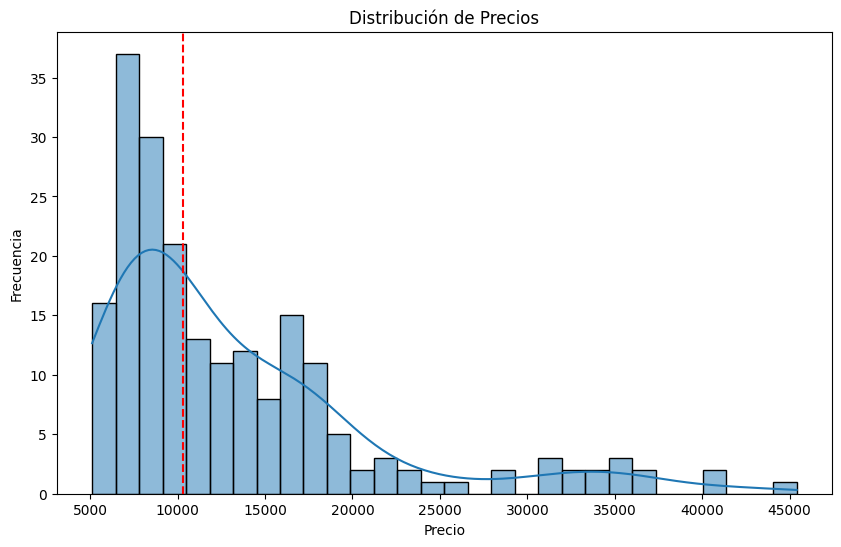

In [12]:
#Distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.axvline(median_price, color='r', linestyle='--')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


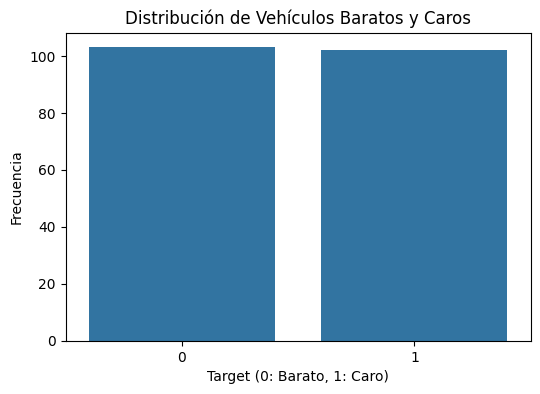

In [11]:
# Distribución de la variable objetivo (target)
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribución de Vehículos Baratos y Caros')
plt.xlabel('Target (0: Barato, 1: Caro)')
plt.ylabel('Frecuencia')
plt.show()


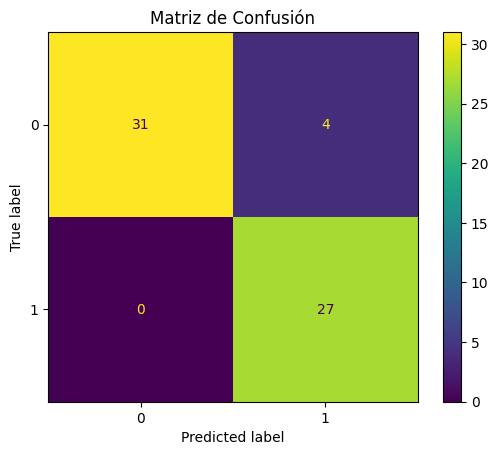

In [13]:
#Matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Matriz de Confusión')
plt.show()


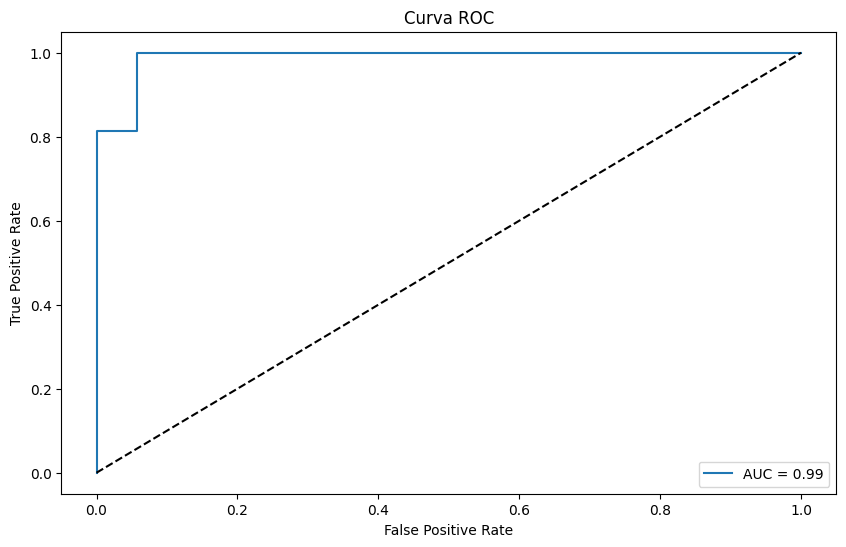

In [14]:
#Curva ROC y AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades de predicción
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Implementar un modelo de regresión con aprendizaje supervisado que permita predecir el precio final de los vehículos, utilizando los datos que se han puesto a su disposición.

In [15]:
#Importar librerías y cargar el CSV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el CSV
file_path = 'ML_cars.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [16]:
# Información general del dataframe
print(df.info())

# Estadísticas descriptivas
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [17]:
# Eliminar columnas no necesarias
df = df.drop(['car_ID', 'CarName'], axis=1)

# Convertir variables categóricas a variables dummy
df = pd.get_dummies(df, drop_first=True)

# Separar características y variable objetivo
X = df.drop('price', axis=1)
y = df['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 7052032.685191177
R^2 Score: 0.8982161227892816


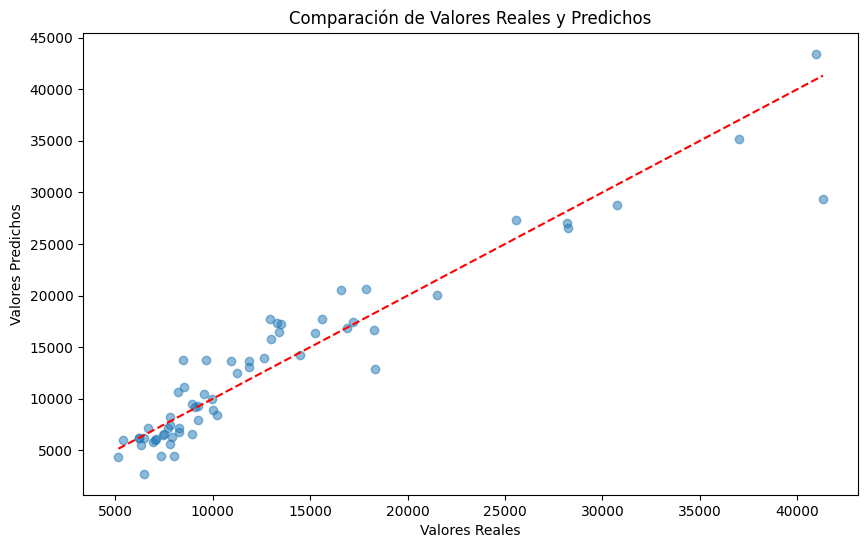

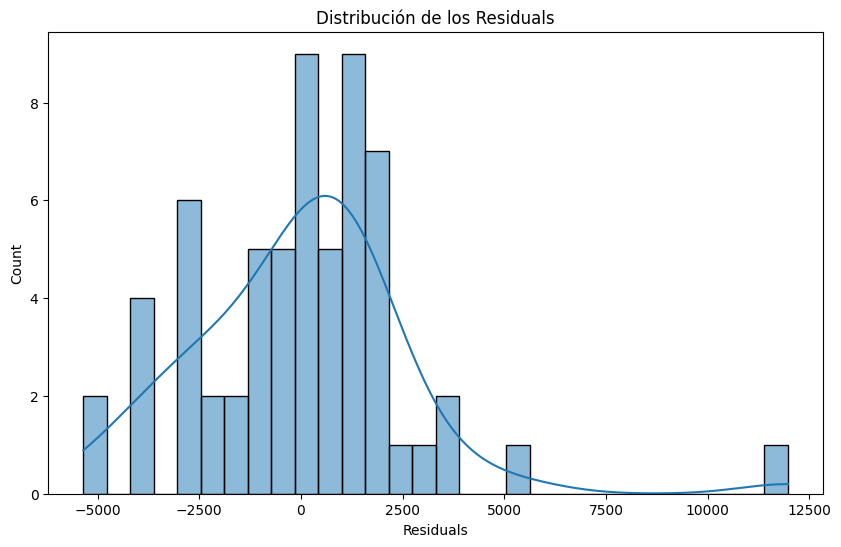

In [19]:
# Comparación de valores reales y predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación de Valores Reales y Predichos')
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribución de los Residuals')
plt.show()
